### Dataset Info. 
Source: Kaggle-Datasets  
Dataset: Faulty Steel Plates  
Features(x): 27 (25 continuous; 2 category)  
Target(y): 7 classes of defects (six types + "other")  
Sample size: 1941

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read dataset
df = pd.read_csv('faults.csv')

# merge one hot encoded classes into a multiclass
field = (df.iloc[:,-7:]==1).idxmax(1)
df = df.drop(df.columns.values[-7:], axis = 1)
df['Defected_type'] = field

# drop redundant column
df = df.drop('TypeOfSteel_A300', axis = 1)
df = df.rename(columns = {'TypeOfSteel_A400':'TypeOfSteel'})
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Defected_type
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [3]:
# split data into train set and test set
from sklearn.model_selection import train_test_split
y = df['Defected_type']
x = df.copy().drop(columns=['Defected_type'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

#### Result of the prediction from a Random Forest Classifier:

              precision    recall  f1-score   support

       Bumps       0.66      0.64      0.65        77
   Dirtiness       1.00      0.88      0.93        16
    K_Scatch       0.95      0.97      0.96        72
Other_Faults       0.67      0.79      0.72       129
      Pastry       0.91      0.54      0.68        39
      Stains       1.00      0.88      0.93        16
   Z_Scratch       0.89      0.82      0.86        40

   micro avg       0.78      0.78      0.78       389
   macro avg       0.87      0.79      0.82       389
weighted avg       0.79      0.78      0.78       389

Total testing score: (0.8685300207039337, 0.7875350102094288, 0.8189348380104257, None)
Total training score: (1.0, 1.0, 1.0, None)


<Figure size 432x288 with 0 Axes>

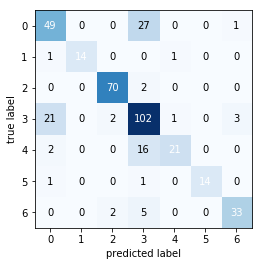

In [4]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state = 0)
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)

y_predict_train= rfc.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_predict)
plt.figure()
plot_confusion_matrix(cm)

from sklearn.metrics import precision_recall_fscore_support
test_score = precision_recall_fscore_support(y_test,y_predict,average='macro')
train_score = precision_recall_fscore_support(y_train,y_predict_train,average='macro')
print("Total testing score: {}".format(test_score))
print("Total training score: {}".format(train_score))

There is confuse between the first class "Bumps" and the forth class "Other_Faults" -> merge samples in these two classes and rebuild an new model for prediction.

In [5]:
# merge the multiclass into two classes 
df.loc[~df.loc[:,'Defected_type'].isin(['Bumps','Other_Faults']),'Defected_group']='Ex_B.O'
df.loc[df.loc[:,'Defected_type'].isin(['Bumps','Other_Faults']),'Defected_group']='In_B.O'
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Defected_type,Defected_group
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,Ex_B.O
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,Ex_B.O
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,Ex_B.O
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,Ex_B.O
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,Ex_B.O


In [6]:
y_new = df.loc[df['Defected_group']=='In_B.O']['Defected_type']
x_new = df.loc[df['Defected_group']=='In_B.O'].copy().drop(columns=['Defected_type','Defected_group'])
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size = 0.2, random_state = 10)

#### Below shows the result of the prediction from the new Random Forest Classifier:

              precision    recall  f1-score   support

       Bumps       0.62      0.59      0.61        73
Other_Faults       0.79      0.82      0.81       142

   micro avg       0.74      0.74      0.74       215
   macro avg       0.71      0.70      0.71       215
weighted avg       0.74      0.74      0.74       215

Total testing score: (0.7088544768711534, 0.7029712521705576, 0.7055946791862285, None)
Total training score: (1.0, 1.0, 1.0, None)


<Figure size 432x288 with 0 Axes>

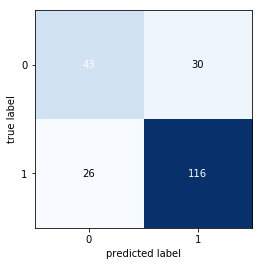

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc_new = RandomForestClassifier(n_estimators=100,random_state = 0)
rfc_new.fit(x_train_new, y_train_new)
y_predict_new = rfc_new.predict(x_test_new)

y_predict_train_new= rfc_new.predict(x_train_new)

from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_predict_new))

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test_new,y_predict_new)
plt.figure()
plot_confusion_matrix(cm)

from sklearn.metrics import precision_recall_fscore_support
test_score_new = precision_recall_fscore_support(y_test_new,y_predict_new,average='macro')
train_score_new = precision_recall_fscore_support(y_train_new,y_predict_train_new,average='macro')
print("Total testing score: {}".format(test_score_new))
print("Total training score: {}".format(train_score_new))

### SHAP value

In [8]:
# Extract misclassified samples
y_test_new_reindex = y_test_new.reset_index(drop=True)
x_test_new_reindex = x_test_new.reset_index(drop=True)

false_info = []
for i in range(len(y_test_new)):
    if y_test_new_reindex[i] != y_predict_new[i]:
        false_info.append([i,y_predict_new[i]])
false_df = pd.DataFrame(false_info, columns=['id','false_type'])
false_df.head()

,id,false_type
0,13,Other_Faults
1,14,Bumps
2,19,Other_Faults
3,22,Other_Faults
4,25,Other_Faults


#### Below shows the visualization of SHAP value of the misclassified sample

In [9]:
import shap

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(rfc_new)
shap_values = explainer.shap_values(x_test_new)

# load JS visualization code to notebook
shap.initjs()

# visualize the error prediction's explanation
# SHAP values for predicting as "Bumps"
shap.force_plot(explainer.expected_value[0], shap_values[0][13,:], x_test_new_reindex.iloc[13,:])

In [10]:
# SHAP values for predicting as "Other_Faults"
shap.force_plot(explainer.expected_value[1], shap_values[1][13,:], x_test_new_reindex.iloc[13,:])

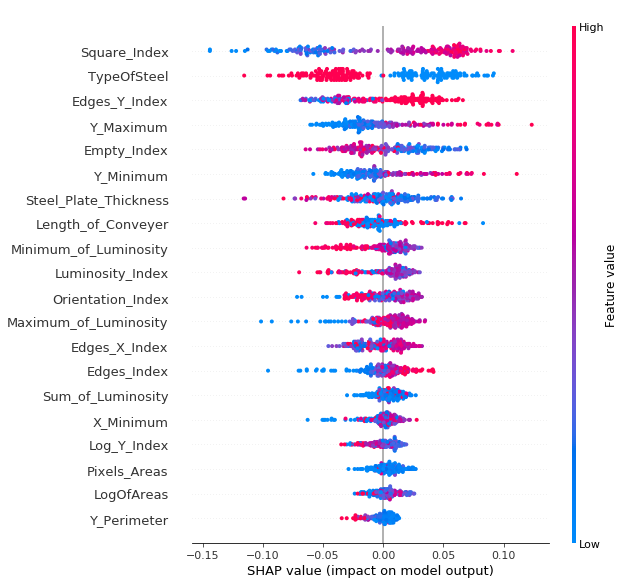

In [11]:
# summarize the effects of all the features
shap.summary_plot(shap_values[0], x_test_new)

### Reference
[A unified approach to explain the output of any machine learning model](https://github.com/slundberg/shap)